# 📇 선형회귀 : 보험료 예측하기

## 📞 라이브러리 및 데이터 불러오기

### 라이브러리 임포트

In [ ]:
#@title 판다스 (pandas)
import pandas as pd

### 데이터셋 읽기


In [ ]:
#@title pd.read_csv()
# https://www.kaggle.com/datasets/awaiskaggler/insurance-csv?select=insurance.csv
# !ls
# df = pd.read_csv("insurance.csv")
# df.head()
file_name = "insurance.csv" #@param{"type":"string"}
file_url = f"https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/{file_name}"
# file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/insurance.csv"
df = pd.read_csv(file_url)
df # 1338 rows × 7 columns

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
#@title df.head()
# 최상단 5개 데이터
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
#@title df.tail()
# 최하단 5개 데이터
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
#@title df.info()
# 데이터가 가지고 있는 변수 확인
df.info()
# Column : 변수 이름
# Non-Null Count : 결측치
# Dtype : 자료형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#@title df.describe()
# 통계 정보 출력
# 연속형 변수에 대한 통계값
# → sex, smoker, region 제외
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
# 데이터 프레임 내부의 값을 소수점 2자리까지만 표시
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


## 🛠 전처리

### 범주형 변수 변환

* 연속형 변수
    * 연속적으로 이어지는 변수
    * 데이터 간의 크고 작음을 비교하거나 사칙연산 가능
* 범주형 변수
    * 이어지는 숫자가 아닌 각 범주로 구성된 변수
    * 크거나 작다고 할 수 없으며, 평균이라는 개념 또한 존재할 수 없음 

```
😲 Object 형태로 표현된 범주형 변수로는 모델링할 수 없음
```

In [ ]:
# 맛보기
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# df.columns 
# Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')
model.fit(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], df['expenses'])

ValueError: ignored

In [ ]:
#@title Object → 0 or 1
#@markdown 흡연 여부 : yes/no -> 0/1
# eq 메소드로 통해 yes와 일치하는지 Boolean화한 뒤
# mul 메소드로 1을 곱해줌 (1/0)
df.smoker = df.smoker.eq('yes').mul(1)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86


#### 더미 변수 / 원-핫 인코딩

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
expenses    float64
dtype: object

In [ ]:
#@title df.column.unique(), df.column.nunique()
# 범주 갯수 확인
df.sex.unique(), df.sex.nunique(), df.region.unique(), df.region.nunique(),

(array(['female', 'male'], dtype=object),
 2,
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object),
 4)

In [ ]:
#@title pd.get_dummies()
pd.get_dummies(df, columns = ['sex', 'region'])
# 1338 rows × 11 columns

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,1,0,0,0,0,1
1,18,33.80,1,0,1725.55,0,1,0,0,1,0
2,28,33.00,3,0,4449.46,0,1,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,1,0,0
4,32,28.90,0,0,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,0,1,0,1,0,0
1334,18,31.90,0,0,2205.98,1,0,1,0,0,0
1335,18,36.90,0,0,1629.83,1,0,0,0,1,0
1336,21,25.80,0,0,2007.95,1,0,0,0,0,1


In [ ]:
# 고윳값을 덜어내어 부하 줄임 (계산양 줄임)
pd.get_dummies(df, columns = ['sex', 'region'], drop_first=True)
# 1338 rows × 9 columns

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [ ]:
# 원본에 반영
df = pd.get_dummies(df, columns = ['sex', 'region'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   expenses          1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


### 학습셋과 시험셋 나누기
**데이터 분할 작업**
1. 종속변수와 독립변수 분리
2. 학습셋(Train set)과 시험셋(Test set) 분리
    * 학습용 데이터셋, 평가용 시험셋

||독립변수|종속변수|
|-|-|-|
|학습셋|X_train|y_train|
|시험셋|X_test|y_test|


#### 독립변수와 종속변수
* **독립변수**
  * 예측에 사용되는 재료와 같은 변수들
  * 피쳐 변수(Feature variable), 피쳐(Feature)
* **종속변수**
  * 예측을 하려는 대상 변수
  * 목표 변수 (Target variable), 타깃

_Why?_ : 지도 학습에 속하는 모델은 독립변수를 예측하는 것이므로, 모델링할 때 어떤 변수가 종속변수인지 명확히 알려주어야 함 → 독립변수와 종속변수를 각각 별도의 데이터로 입력 받음

#### 학습셋과 시험셋
_Why?_ : 학습셋과 시험셋을 구분하지 않고 예측 모델을 만들 경우 새로운 데이터에 대한 예측력을 검증할 수 없음
* 전체 데이터를 가지고 모델링(학습)을 하고, 또 다시 전체 데이터에 대해서 예측값을 만들어서 종속변수와 비교했기 때문에 특정 데이터에 대해 과최적 되었을 수 있음
* 시험셋을 통해 검증하지 않은 상태라는 불확실성을 줄일 수 있음
* 일반적으로 **학습셋:시험셋**을 각각 7:3, 8:2 정도로 나눔<br>(전체 데이터가 적을 경우 학습셋을 우선시)

#### 데이터셋 나누기

In [ ]:
#@title 독립변수, 종속변수
# df.info()
# df.columns
# 독립변수
X = df[['age', 'bmi', 'children', 'smoker', 'sex_male',
        'region_northwest', 'region_southeast', 'region_southwest']]
# 종속변수 : 보험료
y = df['expenses']

In [ ]:
#@title 사이킷런
from sklearn.model_selection import train_test_split

In [ ]:
#@title train_test_split()
# random_state : 일관성 유지 (like시드)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=100)

## 🗽 모델링
* 머신러닝 알고리즘으로 모델을 학습시키는 과정 → 결과물 : 머신러닝 모델
* 모델링에 사용할 머신러닝 알고리즘을 선택
* 독립변수와 종속변수를 *fit()* 함수에 인수로 주어 학습

|알고리즘 선택| |모델 생성| |모델 학습| |모델을 사용한 예측|
|-|-|-|-|-|-|-|
|다양한 머신러닝<br>알고리즘 중 선택 후<br>라이브러리 임포트|→|모델링에 사용할<br>모델 생성|→|*fit()* 함수에 학습셋의<br>독립변수와 종속변수를<br>인수로 대입|→|train_test_split()<br>함수에 평가셋의 <br>독립변수를 인수로 대입

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
#@title model.fit()
# 모델을 학습시키는 함수
# [학습시킨다]
# - 데이터를 모델 안에 넣어서
# - 독립변수와 종속변수 간의 관계들을 분석해
# - 새로운 데이터를 예측할 수 있는 상태로 만드는 것
# model.fit(독립변수, 종속변수)
model.fit(X_train, y_train)

LinearRegression()

## 🏁 예측
* 모델을 활용해 예측

In [ ]:
#@title model.predict()
pred = model.predict(X_test)

## 👀 예측 모델 평가
* 테이블로 평가
* 그래프로 평가 ✔
* 통계적 방법으로 평가 (RMSE) ✔✔✔

### 테이블로 평가

In [ ]:
# 두 데이터를 비교하여 정확도 확인
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [ ]:
X_test

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
12,23,34.40,0,0,1,0,0,1
306,28,27.50,2,0,0,0,0,1
318,44,27.60,0,0,0,1,0,0
815,20,31.50,0,0,0,0,1,0
157,18,25.20,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
713,20,40.50,0,0,1,0,0,0
1282,18,21.70,0,1,0,0,0,0
531,62,31.70,0,0,0,0,0,0
537,46,30.20,2,0,0,0,0,1


In [ ]:
# 한 눈에 비교하기 어려움
comparison

,actual,pred
12,1826.84,4331.00
306,20177.67,4432.63
318,7421.19,8450.53
815,1877.93,2822.16
157,15518.18,24753.08
...,...,...
713,1984.45,6557.66
1282,14283.46,23649.64
531,14043.48,14879.04
537,8825.09,10021.48


### 그래프로 평가

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

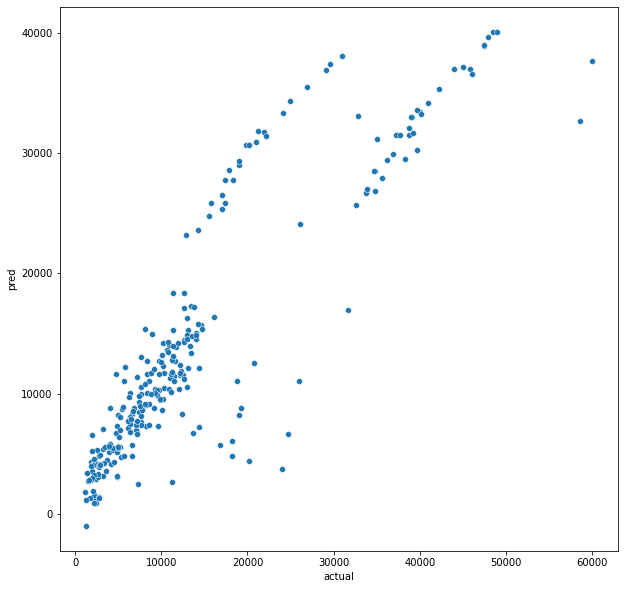

In [ ]:
#@title 산점도 그리기 (sns.scatterplot())
plt.figure(figsize=(10,10)) # 사이즈 설정
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

### RMSE & R²(결정계수)

|평가지표|설명|
|-|-|
|MAE (Mean Absolute Error, 평균 절대 오차)|- 실젯값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|MSE (Mean Squared Error, 평균 제곱 오차)|- 실젯값과 예측값 사이의 오차를  제곱한 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|RMSE (Root Mean Absolute Error, 루트 평균 제곱 오차)<br>|- MSE에 루트를 씌운 값<br>- 0에 가까울수록 좋음<br>- 연속형 변수를 예측할 때 가장 일반적으로 사용되는 평가지표|
|R²|- 결정계수<br>- 독립변수가 종속변수를 얼마만큼 설명해 주는지 나타내는 지표, 즉 설명력<br>- 1에 가까울수록 좋음|
```

In [ ]:
#@title mean_squared_error()
from sklearn.metrics import mean_squared_error

In [ ]:
# MSE
# mean_squared_error(y_test, pred)
# RMSE
mean_squared_error(y_test, pred) ** 0.5

5673.925913666443

In [ ]:
mean_squared_error(y_test, pred, squared=False)

5673.925913666443

In [ ]:
#@title model.score()
#@markdown $R^2 = \frac{SSR}{SST}$<br>
#@markdown * **SST** (Sum of Squares Total) : 총변동
#@markdown * **SSR** (Sum of Squares Regression) : 설명 가능한 변동
#@markdown * 모델이 얼마나 값의 변동을 잘 설명하는가? = 예측을 잘하는가?
model.score(X_train, y_train)

0.7380843471816282

## 🥕 이해

### 선형회귀 `Linear Regression`
* 독립변수와 종속변수 간에 선형 관계가 있음을 가정하여 최적의 선을 그려서 예측하는 방법
* 머신러닝에서는 손실 함수`Loss Function`를 최소화하는 선을 찾아서 모델을 만들어냄
* 수식을 도출하기 매우 쉽기 때문에 그 해석도 매우 직관적

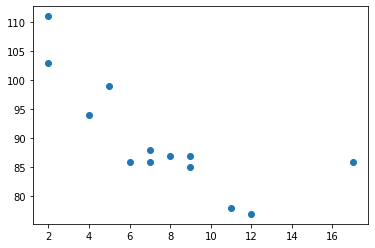

In [ ]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

-1.7512877115526118 103.10596026490066


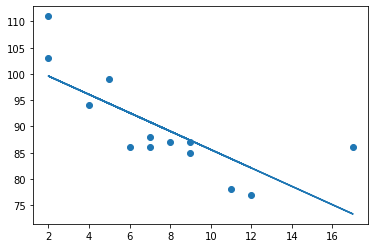

In [ ]:
from scipy import stats

# 기울기(계수), y절편
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
#@title model.coef_
# 독립변수별 계수 확인
import numpy as np

np.set_printoptions(precision=3)
model.coef_

array([ 2.637e+02,  3.117e+02,  4.731e+02,  2.349e+04,  1.246e+01,
       -4.033e+02, -9.177e+02, -1.116e+03])

In [ ]:
pd.Series(model.coef_, index = X.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64

In [ ]:
#@title model.intercept_
# y절편 확인
model.intercept_

-11353.689780589895

### 🙀 유의할 점
* 모델의 계수를 해석할 때 부호의 영향에 유의
* 부호와 상관없이 **계수의 절댓값이 클수록 영향이 크다**고 할 수 있고, 절댓값이 0에 가까울수록 영향력이 거의 없음
* 다만, 여러 계수를 서로 비교할 때 단순히 절댓값이 더 크면 영향이 더 크다고 보기에는 무리가 있음 → 각 변수의 스케일이 다르기 때문
  * 예) 성별은 0과 1로만 되어 있는 반면, 나이는 20부터 60 등 십의 자리 숫자를 가지고 있음. 즉, 성별이 1 커질 때와 나이가 1 커질 때가 지니는 영향력이 다르다는 것
* 이 부분을 명료하게 비교하려면 스케일링 작업이 필요 (To Be Continue...)

### 🪡 관련 모델

In [ ]:
def score_model(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "RMSE" : mean_squared_error(y_test, pred, squared=False),
        "R²": model.score(X_test, y_test)
    }

In [ ]:
score_model(LinearRegression())

{'RMSE': 5673.925913666443, 'R²': 0.7946953084832674}

In [ ]:
#@title 릿지 회귀 (Ridge Regression)
#@markdown * 선형 회귀 모델에 L2 정규화를 적용시킨 모델
#@markdown * 오버피팅을 억제하는 효과
from sklearn.linear_model import Ridge

score_model(Ridge())

{'RMSE': 5681.410468798602, 'R²': 0.794153310652963}

In [ ]:
#@title 라쏘 회귀 (Lasso Regression)
#@markdown * 선형 회귀 모델에 L1 정규화를 적용시킨 모델
#@markdown * 피처 셀렉션 및 오버피팅을 억제하는 효과
from sklearn.linear_model import Lasso

score_model(Lasso())

{'RMSE': 5674.103332369841, 'R²': 0.7946824688860602}

In [ ]:
#@title 엘라스틱 넷 (Elastic Net)
#@markdown * 릿지 회귀와 라쏘 회귀의 단점을 절충
from sklearn.linear_model import ElasticNet

score_model(ElasticNet())

{'RMSE': 10009.085416144599, 'R²': 0.3611184549032317}

## 💾 모델 배포

In [ ]:
!pip install mlxtend --quiet
import joblib

joblib.dump(model, 'first_model.pkl') 

NameError: ignored

In [ ]:
model_from_joblib = joblib.load('first_model.pkl')
pd.Series(model_from_joblib.coef_, index = X.columns)